# Personal EDA & ML Implementation
# House Sale Prediction

Pada kasus ini, saya akan coba memprediksi harga suatu rumah berdasarkan variabel-variabel pertimbangan yang ada dalam dataset dengan menggunakan teknik atau algoritma-algoritma Regression. Untuk itu, ada beberapa tahap yang akan dilewati:
1. Pengecekan Keseluruhan Data
2. Quick EDA for Features Selection
2. Mendapatkan Evaluation Matrix dari Base Model
4. Improvisation
5. Kesimpulan

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, median_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

## 1. Pengecekan Keseluruhan Data

In [2]:
pd.options.display.max_columns = 999

In [3]:
df = pd.read_csv('kc_house_data.csv')
original_df = df.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [6]:
pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[3131200640, 3575302938]"
1,date,object,0,0.0,372,"[20150415T000000, 20150130T000000]"
2,price,float64,0,0.0,4028,"[572800.0, 387865.0]"
3,bedrooms,int64,0,0.0,13,"[8, 3]"
4,bathrooms,float64,0,0.0,30,"[1.25, 8.0]"
5,sqft_living,int64,0,0.0,1038,"[4530, 1040]"
6,sqft_lot,int64,0,0.0,9782,"[4649, 8667]"
7,floors,float64,0,0.0,6,"[1.5, 2.0]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[3, 0]"


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Sepertinya data yang sudah cukup bersih dikarenakan tidak adanya data yang NULL. Selanjutnya kita pelajari maksud dari tiap fetures:

- Id: Identification number of each house sold
- Date: Date the house was sold
- Price: Selling price of each house
- Bedrooms: Number of bedrooms
- Bathrooms: Number of bathrooms and their types
    - 1 = full Bathroom (toilet, washbasin, shower, bathtub)**
    - .75 = washbasin, shower and toilet**
    - .5 = toilet and washbasin**
    - .25 = least amount of space and it just a toilet**
- Sqft_living: Total area of the house
- Sqft_lot: Land area
- Floors: Number of floors
- Waterfront: Dummy variable to determine if the house is on the beach, 0 indicates the house is not on the beach, 1 indicates yes
- View: Index from 1 to 4 which shows how good the panoramic view of the house is
- Condition: Index 1-5 which shows how good the condition of the house is
- Grade: Index 1-13 which shows the quality of design and construction. 1-3 shows the construction and design of houses that are not good enough, index 7 shows construction and design with average quality, and index 11-13 shows houses that have high quality construction and design
- Sqft_above: The area of the house that is above ground level
- Sqft_basement: The area of the house building which is below ground level
- Yr_built: The first year the house was built
- Yr_renovated: Last year the house was under renovation
- Zipcode: The zip code of the house
- Lat: Lattitude
- Long: Longitude
- Sqft_living15: Area of residential interiors for the 15 closest neighbors
- Sqft_lot15: Area of residential land for the 15 closest neighbors

## 2. Quick EDA for Features Selection

Setelah melihat maksud dari tiap features, kita pilih features yang mungkin berpengaruh terhadap harga rumah(price)

**Asumsi awal:**
1. Bedroom berpengaruh terhadap Price
2. Bathrooms berpengaruh terhadap Price
3. Sqft_lot berpengaruh terhapad Price (Luas Tanah bangunan pasto sudah merpresentasikan luas bangunan)
4. Waterfront berpengaruh terhadap Price (Karena makin dekat dengan pantai berarti akses ke pusat kota atau keselamatan jika terjadi bencana pasti berpengaruh)
5. View berpengaruh terhadap Price (Nilai estetika selalu jadi pertimbangan pembeli)
6. Grade berpengaruh terhadap Price (Bahan material bangunan dan design jelas menjadi pertimbangan)
7. Lat & Long berpengearuh terhadap Price 


 
nb:
1. Floors tidak dimasukkan karena sudah memiliki pengaruh terhadap Bedroom dan Bathrooms
2. Condition tidak dimasukkan karena sudah direpresentasikan dengan Grade
3. Yr_buit dan Yr_renovated belum berpengaruh sekali, mungkin nanti ketika improvisasi akan dimasukkan
4. Another sqft tidak perlu dimasukkan karena sudah direpresentasikan Sqft_living
5. Id dan Date jelas tidak dimasukkan

***2.1 Bedroom - Price***

In [8]:
df.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [9]:
df.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

Terdapat Jumlah kamar yang sepertinya tidak masuk akal untuk ukuran sebuah rumah dan juga ada kamar yang 0; gimana coba?. Coba kita lihat data tersebut:

In [10]:
df[(df.bedrooms == 0) | (df.bedrooms > 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


Hanya ada 1 data yang jumlah kamarnya 33 dan sisanya 0. Karena jumlahnya tidak cukup banyak maka kita akan buang data di atas.

In [11]:
df.drop(df[(df.bedrooms == 0) | (df.bedrooms > 11)].index, inplace=True)

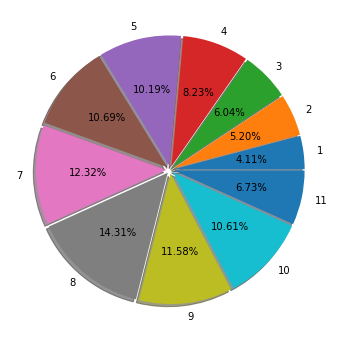

In [12]:
df_mean_bedrooms = (df[['bedrooms', 'price']].groupby(['bedrooms']).mean()*100)

plt.figure(figsize=(10,6))
plt.pie(df_mean_bedrooms['price'], labels=['1','2','3','4','5','6','7','8','9','10','11'],
        shadow=True, 
        autopct = '%1.2f%%',
        explode = (0.03, 0.03, 0.03 , 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)
       )
plt.show()

Setelah dilihat perbandingan jumlah kamar dengan harga rumah, dapat kita beri kesimpulan sementara bahwa feature ini berpengaruh terhadap price dikarenakan selisih perbandingan antar jumlah kamar cukup besar.

***2.2 Bathrooms - Price***

In [13]:
df.bathrooms.describe()

count    21599.000000
mean         2.115549
std          0.769349
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [14]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 0.  , 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Terdapat rumah yang tidak memiliki kamar mandi dan jumlah kamar mandi paling banyak ada 8. Hmm, kalau ada 8 kamar mandi masih masuk akal, cuman kalo tidak ada kamar mandi itu baru tidak masuk akal. Oleh karena itu, kita lihat data rumah yang tidak memiliki kamar mandi:

In [15]:
df[df.bathrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290


Cuma ada 3 rumah yang ga punya kamar mandi dan itu juga dibuat di tahun yang sangat jadul. Jadi kita hapus saja.

In [16]:
df.drop(df[df.bathrooms == 0].index, inplace=True)

In [17]:
df_mean_bathrooms = (df[['bathrooms', 'price']].groupby(['bathrooms']).mean()*100)
df_mean_bathrooms.sort_values(by='price', ascending=False)
# plt.figure(figsize=(10,6))
# plt.pie(df_mean_bedrooms['price'], labels=['1','2','3','4','5','6','7','8','9','10','11'],
#         shadow=True, 
#         autopct = '%1.2f%%',
#         explode = (0.03, 0.03, 0.03 , 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)
#        )
# plt.show()

,price
bathrooms,
7.75,6.885000e+08
8.00,4.990000e+08
6.25,3.094000e+08
6.00,2.946833e+08
6.75,2.734000e+08
5.50,2.522300e+08
5.75,2.492500e+08
4.75,2.021304e+08
5.25,1.817177e+08


Setelah dilihat hasil perbandingan rata-rata tiap jumlah kamar mandi, kita bisa simpulkan kalau feature ini berpengaruh karena selisih rata-rata harga dari tiap jumlah kamar mandi cukup besar.

***2.3 Sqft_lot - Price***

In [18]:
df.sqft_living.describe()

count    21596.000000
mean      2080.343165
std        918.122038
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Untuk data numerikal ini, kita coba lihat hubungannya dengan scatter plot, apakah menunjukkan hubungan yang positif atau tidak.

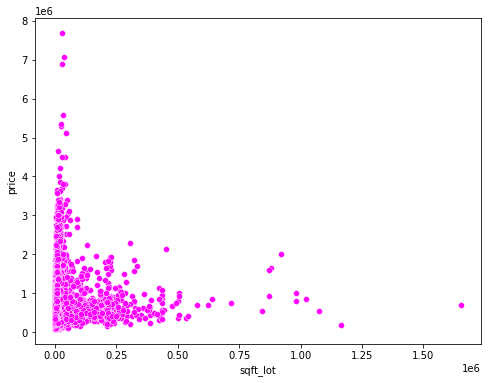

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sqft_lot', y='price',color='magenta');
plt.show()

Dilihat dari hasil scatter plot antara sqft_Living dengan price, dapat disimpulkan bahwa luas tidak adanya hubungan positif antara luas tanah dengan harga rumah. Semakin mahal harga rumah belum tentu luas tanah rumahnya besar juga. Untuk itu kita tidak jadi memasukkan feature ini dalam base model kita.

Namun, saya rasa luas itu juga menjadi salah satu pertimbangan harga rumah. Jika Sqft_lot tidak berhubungan, kita coba cek Sqft_living. Jika hasilnya positif makan Sqft_living akan kita masukkan ke feature base kita.

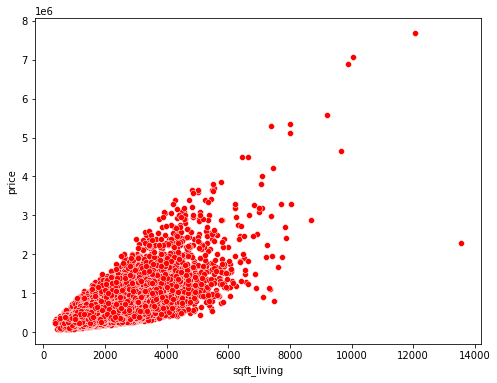

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='sqft_living', y='price',color='red');
plt.show()

Ternyata Sqft_living menunjukkan hubungan linear yang positif terhadap Price. Untuk itu kita coba masukkan Sqft_living ke dalam featues kita.

***2.4 Waterfront - Price***

In [21]:
df.waterfront.unique()

array([0, 1], dtype=int64)

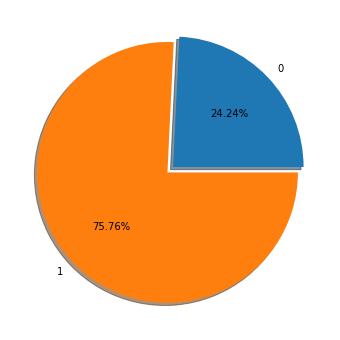

In [22]:
df_mean_water = (df[['waterfront', 'price']].groupby(['waterfront']).mean()*100)

plt.figure(figsize=(10,6))
plt.pie(df_mean_water['price'], labels=['0','1'],
        shadow=True, 
        autopct = '%1.2f%%',
        explode = (0.03, 0.03)
       )
plt.show()

Selisih persentse harga rumah yang dekat pantai dengan tidak cukup besar, sehingga hal tersebut membuat adanya hubungan antara feature ini dengan price 

***2.5 View - Price***

In [23]:
df.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

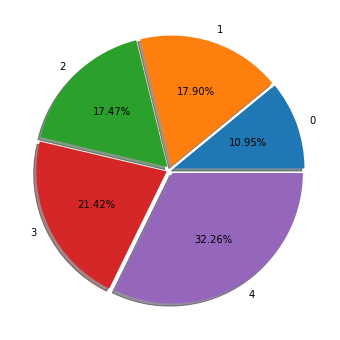

In [24]:
df_mean_view = (df[['view', 'price']].groupby(['view']).mean()*100)

plt.figure(figsize=(10,6))
plt.pie(df_mean_view['price'], labels=['0','1','2','3','4'],
        shadow=True, 
        autopct = '%1.2f%%',
        explode = (0.03, 0.03, 0.03, 0.03, 0.03)
       )
plt.show()

Dilihat dari hasil perbandingan persentase di atas, terdapat selisih yang cukup signifikan dari tiap level view. Untuk itu dapat disimpulkan jika feature ini memiliki hubungan dengan price

***2.6 Grade - Price***

In [25]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

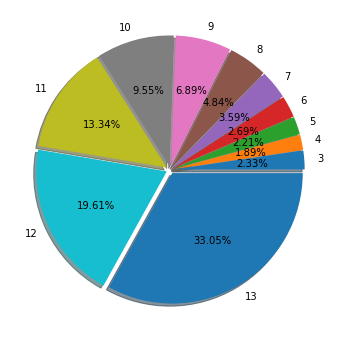

In [26]:
df_mean_grade = (df[['grade', 'price']].groupby(['grade']).mean()*100)
df_mean_grade
plt.figure(figsize=(10,6))
plt.pie(df_mean_grade['price'], labels=['3','4','5','6','7','8','9','10','11','12','13'],
        shadow=True, 
        autopct = '%1.2f%%',
        explode = (0.03, 0.03, 0.03 , 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03)
       )
plt.show()

Setelah dilihat dari pie chart di atas, dapat disimpulkan bahwa feature Grade berpengaruh terhadap price karena selisih persentase di tiap jenis gradenya cukup besar

***2.7 Lat&Long - Price***

Untuk lat & Long kita lanjutkan saja karena lokasi pasti punya pengaruh besar terhadap harga rumah.

## 3. Mendapatkan Evaluation Matrix dari Base Model

Kita sudah memilih features yang akan digunakan untuk mendapatkan Evaluation Matrix dari Base Model kita. Selanjutnya, kita akan melakukan Base Modeling menggunakan features yang sudah dipilih di awal dengan 3 Algoritma pilihan, yaitu:
1. Linear Regression
2. KNN 
3. Random Forest

Untuk itu, lansung saja kita lakukan Base Modeling dengan 3 Algoritma tersebut.

### 3.1 Linear Regression

In [27]:
X_lin = df[['bedrooms', 'bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'lat', 'long']]
y_lin = df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=.20, random_state = 14)

In [29]:
Model_lin_1 = LinearRegression().fit(X_train, y_train)

Oke sampai sini kita sudah membuat model Linear Regression dasar, sebelum lanjut, kita buat dahulu fungsi untuk menampilkan seluruh hasil Evaluation Matrix.

In [30]:
def evaluation_matrix(Model, X, y_test):
    y_pred = Model.predict(X)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse

In [31]:
r2_lin_train, MAE_lin_train, MSE_lin_train, RMSE_lin_train = evaluation_matrix(Model_lin_1, X_train, y_train)
r2_lin_test, MAE_lin_test, MSE_lin_test, RMSE_lin_test = evaluation_matrix(Model_lin_1, X_test, y_test)

In [32]:
data = {
    "Training": [r2_lin_train, MAE_lin_train, MSE_lin_train, RMSE_lin_train],
    "Testing": [r2_lin_test, MAE_lin_test, MSE_lin_test, RMSE_lin_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.597973e-01,6.838895e-01
MAE,1.348307e+05,1.322551e+05
MSE,4.623747e+10,4.118429e+10
RMSE,2.150290e+05,2.029391e+05


Nilai R2 dari hasil prediksi dengan menggunakan Base Model dengan Algoritma Linear Regression untuk data training sebesar: 66%; sedangkan untuk data testingnya: 68%. Hasil dengan data testing lebih bagus dibandingkan dengan data tarining. Namun nilai segitu belum cukup. Kita akan coba lakukan improvisasi nanti.

In [33]:
pred_train = Model_lin_1.predict(X_train)

In [34]:
df_error_checking = X_train.copy()
df_error_checking['target'] = y_train
df_error_checking['prediksi'] = pred_train
df_error_checking['error'] = abs(df_error_checking['target'] - df_error_checking['prediksi'])

In [35]:
df_error_checking.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,lat,long,target,prediksi,error
10114,4,2.50,2910,0,0,8,47.5380,-121.870,585000.0,603293.579694,18293.579694
12107,3,1.50,1600,0,0,7,47.7210,-122.182,405000.0,481611.807283,76611.807283
21257,5,3.50,2760,0,0,8,47.5047,-122.170,424950.0,581848.860793,156898.860793
9800,3,1.75,1380,0,0,7,47.3628,-122.045,240000.0,168713.142340,71286.857660
9122,3,1.75,1200,0,0,6,47.4236,-122.195,250000.0,128195.980273,121804.019727


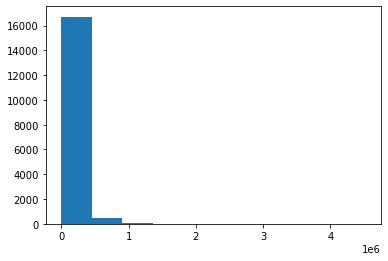

In [36]:
plt.hist(df_error_checking.error)
plt.show()

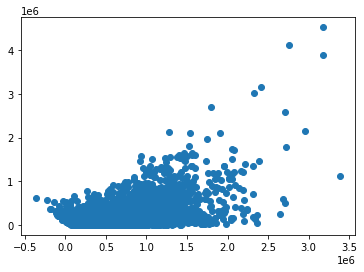

In [37]:
plt.scatter(df_error_checking['prediksi'], df_error_checking['error'])
plt.show()

### 3.2 ElasticNet

In [38]:
Model_e_1 = ElasticNet()

In [39]:
Model_e_1.fit(X_train, y_train)

ElasticNet()

In [40]:
r2_e_train, MAE_e_train, MSE_e_train, RMSE_e_train = evaluation_matrix(Model_e_1, X_train, y_train)
r2_e_test, MAE_e_test, MSE_e_test, RMSE_e_test = evaluation_matrix(Model_e_1, X_test, y_test)

In [41]:
data = {
    "Training": [r2_e_train, MAE_e_train, MSE_e_train, RMSE_e_train],
    "Testing": [r2_e_test, MAE_e_test, MSE_e_test, RMSE_e_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,5.632954e-01,5.882523e-01
MAE,1.577351e+05,1.544470e+05
MSE,5.935319e+10,5.364432e+10
RMSE,2.436251e+05,2.316124e+05


Nilai R2 dari hasil prediksi dengan menggunakan Base Model dengan Algoritma ElasticNet untuk data training sebesar: 56%; sedangkan untuk data testingnya: 58%. Hasil dengan data testing lebih bagus dibandingkan dengan data tarining. Namun nilai segitu belum cukup. Kita akan coba lakukan improvisasi nanti.

### 3.3 Lasso

In [42]:
Model_l_1 = Lasso()

In [43]:
Model_l_1.fit(X_train, y_train)

Lasso()

In [44]:
r2_l_train, MAE_l_train, MSE_l_train, RMSE_l_train = evaluation_matrix(Model_l_1, X_train, y_train)
r2_l_test, MAE_l_test, MSE_l_test, RMSE_l_test = evaluation_matrix(Model_l_1, X_test, y_test)

In [45]:
data = {
    "Training": [r2_l_train, MAE_l_train, MSE_l_train, RMSE_l_train],
    "Testing": [r2_l_test, MAE_l_test, MSE_l_test, RMSE_l_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.597973e-01,6.838905e-01
MAE,1.348299e+05,1.322541e+05
MSE,4.623747e+10,4.118415e+10
RMSE,2.150290e+05,2.029388e+05


Nilai R2 dari hasil prediksi dengan menggunakan Base Model dengan Algoritma ElasticNet untuk data training sebesar: 66%; sedangkan untuk data testingnya: 68%. Hasil dengan data testing lebih bagus dibandingkan dengan data tarining. Namun nilai segitu belum cukup. Kita akan coba lakukan improvisasi nanti.

### 3.4 Base Model dengan All Features

Kemudian kita mencoba untuk melakukan pemodelan dengan seluruh features yang berkaitan, langsung pilih semua saja. Kita akan cobakan dengan algoritma Linear Regression dan Lasso serta untuk features engineeringnya kita pakai polynomial.

In [46]:
X_all = df.drop(columns=['id', 'date', 'price','zipcode'])
y_all = df.price

In [47]:
poli = PolynomialFeatures(degree=3, include_bias=True) 

In [48]:
df_features_poli_all = poli.fit_transform(X_all)
df_features_poli_all.shape

(21596, 1140)

In [49]:
df_fix_poli_all = pd.DataFrame(data=df_features_poli_all)

In [50]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_fix_poli_all, y_all, test_size=.20, random_state = 14)

In [51]:
Model_l_all = Lasso().fit(X_train_all, y_train_all)

In [52]:
r2_l_train_all, MAE_l_train_all, MSE_l_train_all, RMSE_l_train_all = evaluation_matrix(Model_l_all, X_train_all, y_train_all)
r2_l_test_all, MAE_l_test_all, MSE_l_test_all, RMSE_l_test_all = evaluation_matrix(Model_l_all, X_test_all, y_test_all)

In [53]:
data = {
    "Training": [r2_l_train_all, MAE_l_train_all, MSE_l_train_all, RMSE_l_train_all],
    "Testing": [r2_l_test_all, MAE_l_test_all, MSE_l_test_all, RMSE_l_test_all]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.175789e-01,8.455874e-02
MAE,1.020462e+05,1.126702e+05
MSE,2.479313e+10,1.192678e+11
RMSE,1.574583e+05,3.453516e+05


In [54]:
########## Linreg
X_lin_all = df.drop(columns=['id', 'date', 'price','zipcode'])
y_lin_all = df.price

In [55]:
poli = PolynomialFeatures(degree=2, include_bias=True) 

In [56]:
df_poli_all = poli.fit_transform(X_lin_all)
df_poli_all.shape

(21596, 171)

In [57]:
df_all_lin = pd.DataFrame(data=df_poli_all)

In [58]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_all_lin, y_lin_all, test_size=.20, random_state = 14)

In [59]:
Model_lin_all = LinearRegression().fit(X_train_all, y_train_all)

In [60]:
r2_linreg_train_all, MAE_linreg_train_all, MSE_linreg_train_all, RMSE_linreg_train_all = evaluation_matrix(Model_lin_all, X_train_all, y_train_all)
r2_linreg_test_all, MAE_linreg_test_all, MSE_linreg_test_all, RMSE_linreg_test_all = evaluation_matrix(Model_lin_all, X_test_all, y_test_all)

In [61]:
data = {
    "Training": [r2_linreg_train_all, MAE_linreg_train_all, MSE_linreg_train_all, RMSE_linreg_train_all],
    "Testing": [r2_linreg_test_all, MAE_linreg_test_all, MSE_linreg_test_all, RMSE_linreg_test_all]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,8.141794e-01,8.106137e-01
MAE,1.021257e+05,1.014856e+05
MSE,2.525516e+10,2.467409e+10
RMSE,1.589187e+05,1.570799e+05


## 4. Improvisation with Base Features

### 4.1 Improvisation with Linear Regression

Kita akan coba menaikkan hasil r2 testing sebelumnya yang bernilai 68%. Yang akan kita coba lakukan ialah:
1. Features engineering
2. Tuning

***Features Engineering for Linear Regression Model***

In [62]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Ada beberapa tahapan features engineering yang akan dilakukan:
1. Feature yr_renovated kita ganti dengan is_renovated
2. kita drop sqft_living15 dan sqft_lot15 karena seperti multicollinearity
3. Lakukan polynomial
4. Ulangi pemodelan.

In [63]:
df1 = df.copy()

In [64]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***yr_renovated changed into is_renovated (binning)***

In [65]:
df1.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [66]:
df1['is_renovated'] = df1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [67]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [68]:
df1.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

***drop unrelated columns***

In [69]:
df1.drop(columns=['id','date','sqft_living', 'yr_built', 
                        'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [70]:
df1.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,is_renovated
0,221900.0,3,1.00,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,0
1,538000.0,3,2.25,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1
2,180000.0,2,1.00,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,0
3,604000.0,4,3.00,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,0
4,510000.0,3,2.00,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,0


***do polynomial***

In [71]:
x_polynom = df1.drop(columns='price')
y_polynom = df1.price

In [72]:
poli = PolynomialFeatures(degree=2, include_bias=True) 

In [73]:
df_features_poli = poli.fit_transform(x_polynom)
df_features_poli.shape

(21596, 105)

In [74]:
df_fix_poli = pd.DataFrame(data=df_features_poli)

In [75]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df_fix_poli, y_polynom, test_size= .20, random_state=14)

In [76]:
Model_lin_2_pol = LinearRegression(fit_intercept=False).fit(X_train_p, y_train_p)

In [77]:
r2_poly_train, MAE_poly_train, MSE_poly_train, RMSE_poly_train = evaluation_matrix(Model_lin_2_pol, X_train_p, y_train_p)
r2_poly_test, MAE_poly_test, MSE_poly_test, RMSE_poly_test = evaluation_matrix(Model_lin_2_pol, X_test_p, y_test_p)

In [78]:
data = {
    "Training": [r2_poly_train, MAE_poly_train, MSE_poly_train, RMSE_poly_train],
    "Testing": [r2_poly_test, MAE_poly_test, MSE_poly_test, RMSE_poly_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,7.923420e-01,7.888853e-01
MAE,1.085337e+05,1.078273e+05
MSE,2.822311e+10,2.750497e+10
RMSE,1.679974e+05,1.658462e+05


Setelah dilakukan features engineering berupa binning tabel is_renovated dan dari data itu juga dilakukan polynomial, ketika dimodelkan kembali dengan Linear Regression, menghasilkan nilai R2 yang lebih bagus dari sebelumnya. Sekarang nilai R2 Training dan Testingnya sama-sama 79%.

Selanjutnya kita coba lakukan metode Power Transformer untuk imporovisasi model.

In [79]:
# Pilih kolom yang continues
numerical_col = df1[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]

In [80]:
pwr = PowerTransformer(method='yeo-johnson')

In [81]:
numerical_process = pwr.fit_transform(numerical_col)

In [82]:
data_pwr = pd.DataFrame(numerical_process)

In [83]:
#prepare the data set for power
df_pwr = df1.copy()

In [84]:
#drop and replace the numerical data in df_pwr with data_pwr
df_pwr.drop(columns=['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'], inplace=True)
df_pwr.head()

,price,waterfront,view,condition,grade,lat,long,is_renovated
0,221900.0,0,0,3,7,47.5112,-122.257,0
1,538000.0,0,0,3,7,47.7210,-122.319,1
2,180000.0,0,0,3,6,47.7379,-122.233,0
3,604000.0,0,0,5,7,47.5208,-122.393,0
4,510000.0,0,0,3,8,47.6168,-122.045,0


In [85]:
df_pwr_transform = pd.concat([df_pwr, data_pwr], axis=1)
df_pwr_transform.head()

,price,waterfront,view,condition,grade,lat,long,is_renovated,0,1,2,3,4,5
0,221900.0,0.0,0.0,3.0,7.0,47.5112,-122.257,0.0,-0.363013,-1.583719,0.0,-0.975594,0.0,-0.802872
1,538000.0,0.0,0.0,3.0,7.0,47.7210,-122.319,1.0,-0.363013,0.253109,0.0,1.029819,0.0,1.176854
2,180000.0,0.0,0.0,3.0,6.0,47.7379,-122.233,0.0,-1.626613,-1.583719,0.0,-0.975594,0.0,-0.802872
3,604000.0,0.0,0.0,5.0,7.0,47.5208,-122.393,0.0,0.728811,1.136780,0.0,-0.975594,0.0,1.300753
4,510000.0,0.0,0.0,3.0,8.0,47.6168,-122.045,0.0,-0.363013,-0.071114,0.0,-0.975594,0.0,-0.802872


In [86]:
df_pwr_transform.isna().sum()

price           17
waterfront      17
view            17
condition       17
grade           17
lat             17
long            17
is_renovated    17
0               17
1               17
2               17
3               17
4               17
5               17
dtype: int64

In [87]:
df_pwr_transform.dropna(inplace=True)

In [88]:
X_pwr = df_pwr_transform.drop(columns='price')
y_pwr = df_pwr_transform['price']

In [89]:
X_train_pwr, X_test_pwr, y_train_pwr, y_test_pwr = train_test_split(X_pwr, y_pwr, test_size= .20, random_state=14) 

In [90]:
Model_lin_3_pwr = LinearRegression()

In [91]:
Model_lin_3_pwr.fit(X_train_pwr, y_train_pwr)

LinearRegression()

In [92]:
r2_pwr_train, MAE_pwr_train, MSE_pwr_train, RMSE_pwr_train = evaluation_matrix(Model_lin_3_pwr, X_train_pwr, y_train_pwr)
r2_pwr_test, MAE_pwr_test, MSE_pwr_test, RMSE_pwr_test = evaluation_matrix(Model_lin_3_pwr, X_test_pwr, y_test_pwr)

In [93]:
data = {
    "Training": [r2_pwr_train, MAE_pwr_train, MSE_pwr_train, RMSE_pwr_train],
    "Testing": [r2_pwr_test, MAE_pwr_test, MSE_pwr_test, RMSE_pwr_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,5.963780e-01,6.048214e-01
MAE,1.457623e+05,1.430011e+05
MSE,5.637678e+10,4.549624e+10
RMSE,2.374379e+05,2.132985e+05


Ternyata dilakukan power transformer pun hasil r2-nya tidak jadi lebih bagus. R2 untuk data training: 58% lalu R2 untuk data testing itu 59%.

Mungkin dengan model Linear Regression angka R2 tidak jauh lebih dari 78% seperti yang kita lakukan pada feature engineering sengan polynomial. Untuk itu kita coba beralih ke model ElasticNet.

### 4.2 Improvisation with ElasticNet

Dengan algoritma ini kita coba melakukan Tuning featuresnya.

***Improvement with Tunning for ElasticNet Model***

In [94]:
# Buat dahulu fungsi tunning
def Manual_Tune(Alpha, X_train, X_test, y_train, y_test):
    train_r = []
    test_r= []
    for i in Alpha:
        Model = ElasticNet(alpha=i).fit(X_train, y_train)
        y_pred_train =Model.predict(X_train)
        R2_train = r2_score(y_train, y_pred_train)
        train_r.append(R2_train)
        y_pred_test =Model.predict(X_test)
        R2_test = r2_score(y_test, y_pred_test)
        test_r.append(R2_test)
    return train_r, test_r

In [95]:
X_tune = df1.drop(columns='price')
y_tune = df1.price

In [96]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tune, y_tune, test_size=.20, random_state = 14)

In [97]:
param = [0.001, 0.005, 0.007, 0.01,0.05, 0.07, 0.1, 0.5, 0.7, 1, 10, 25, 50, 70, 100, 250, 500, 700, 1000]

In [98]:
train_E, test_E = Manual_Tune(param, X_train1, X_test1, y_train1, y_test1)

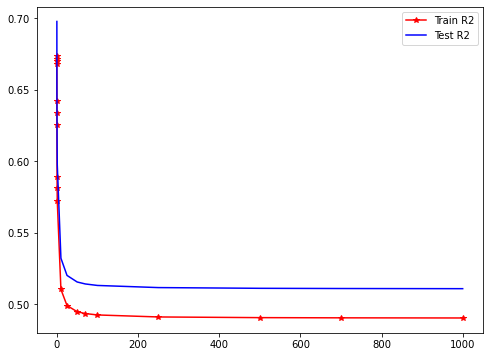

In [99]:
plt.figure(figsize=(8,6))
plt.plot(param, train_E, 'r-*')
plt.plot(param, test_E, 'b')
plt.legend(['Train R2', 'Test R2'])
plt.show()

In [100]:
np.argmax(test_E)

0

In [101]:
param[0]

0.001

Samapai sini kita dapat nilai alpha untuk Model ElasticNet kita yaitu 0.001. Selanjutnya kita coba lihat pemodelan dengan nilai alpha tersebut

In [102]:
Model_e_2 = ElasticNet(alpha=0.001)

In [103]:
Model_e_2.fit(X_train1, y_train1)

ElasticNet(alpha=0.001)

In [104]:
r2_e2_train, MAE_e2_train, MSE_e2_train, RMSE_e2_train = evaluation_matrix(Model_e_2, X_train1, y_train1)
r2_e2_test, MAE_e2_test, MSE_e2_test, RMSE_e2_test = evaluation_matrix(Model_e_2, X_test1, y_test1)

In [105]:
data = {
    "Training": [r2_e2_train, MAE_e2_train, MSE_e2_train, RMSE_e2_train],
    "Testing": [r2_e2_test, MAE_e2_test, MSE_e2_test, RMSE_e2_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.736391e-01,6.978550e-01
MAE,1.315387e+05,1.288890e+05
MSE,4.435620e+10,3.936480e+10
RMSE,2.106091e+05,1.984056e+05


Dari hasil tunning sebelumnya, kita mendapatkan nilai alpha sebesar 0.001, setelah itu dari nilai alpha itu kita lakukan kembali pemodelan dengan menggunakan model ElasticNet, dan hasilnya mendapatkan nilai r2 yang lebih bagus dibandingkan dengan Base Model dari ElasticNet sendiri, yaitu sebesar 70% untuk data testing.

In [106]:
df_features_poli_e = poli.fit_transform(X_tune)
df_features_poli_e.shape

(21596, 105)

In [107]:
df_fix_poli_e = pd.DataFrame(data=df_features_poli_e)

In [108]:
X_train_p_e, X_test_p_e, y_train_p_e, y_test_p_e = train_test_split(df_fix_poli_e, y_tune, test_size= .20, random_state=14)

In [109]:
Model_e_3_pol = ElasticNet(alpha=0.001).fit(X_train_p_e, y_train_p_e)

In [110]:
r2_e_train_p, MAE_e_train_p, MSE_e_train_p, RMSE_e_train_p = evaluation_matrix(Model_e_3_pol, X_train_p_e, y_train_p_e)
r2_e_test_p, MAE_e_test_p, MSE_e_test_p, RMSE_e_test_p = evaluation_matrix(Model_e_3_pol, X_test_p_e, y_test_p_e)

In [111]:
data = {
    "Training": [r2_e_train_p, MAE_e_train_p, MSE_e_train_p, RMSE_e_train_p],
    "Testing": [r2_e_test_p, MAE_e_test_p, MSE_e_test_p, RMSE_e_test_p]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,7.572575e-01,7.539573e-01
MAE,1.157314e+05,1.143686e+05
MSE,3.299150e+10,3.205554e+10
RMSE,1.816356e+05,1.790406e+05


### 4.3 Improvisation with Lasso

Selanjutnya kita coba lakukan improvisasi model Lasso dengan melakukan Scalling MinMax

In [112]:
#kita gunakan numerical col yang sama
numerical_col = df1[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]

In [113]:
minmax = MinMaxScaler().fit_transform(numerical_col)

In [114]:
data_mm = pd.DataFrame(minmax)

In [115]:
#prepare the data set for minmax
df_mm = df1.copy()

In [116]:
#drop and replace the numerical data in df_pwr with data_pwr
df_mm.drop(columns=['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'], inplace=True)
df_mm.head()

,price,waterfront,view,condition,grade,lat,long,is_renovated
0,221900.0,0,0,3,7,47.5112,-122.257,0
1,538000.0,0,0,3,7,47.7210,-122.319,1
2,180000.0,0,0,3,6,47.7379,-122.233,0
3,604000.0,0,0,5,7,47.5208,-122.393,0
4,510000.0,0,0,3,8,47.6168,-122.045,0


In [117]:
df_minmax = pd.concat([df_mm, data_mm], axis=1)
df_minmax.head()

,price,waterfront,view,condition,grade,lat,long,is_renovated,0,1,2,3,4,5
0,221900.0,0.0,0.0,3.0,7.0,47.5112,-122.257,0.0,0.2,0.066667,0.003108,0.0,0.089602,0.000000
1,538000.0,0.0,0.0,3.0,7.0,47.7210,-122.319,1.0,0.2,0.233333,0.004072,0.4,0.199115,0.082988
2,180000.0,0.0,0.0,3.0,6.0,47.7379,-122.233,0.0,0.1,0.066667,0.005743,0.0,0.044248,0.000000
3,604000.0,0.0,0.0,5.0,7.0,47.5208,-122.393,0.0,0.3,0.333333,0.002714,0.0,0.075221,0.188797
4,510000.0,0.0,0.0,3.0,8.0,47.6168,-122.045,0.0,0.2,0.200000,0.004579,0.0,0.144912,0.000000


In [118]:
df_minmax.isna().sum()

price           17
waterfront      17
view            17
condition       17
grade           17
lat             17
long            17
is_renovated    17
0               17
1               17
2               17
3               17
4               17
5               17
dtype: int64

In [119]:
df_minmax.dropna(inplace=True)

In [120]:
X_mm = df_minmax.drop(columns='price')
y_mm = df_minmax['price']

In [121]:
X_train_mm, X_test_mm, y_train_mm, y_test_mm = train_test_split(X_mm, y_mm, test_size= .20, random_state=14) 

In [122]:
Model_l_2 = Lasso()

In [123]:
Model_l_2.fit(X_train_mm, y_train_mm)

Lasso()

In [124]:
r2_mm_train, MAE_mm_train, MSE_mm_train, RMSE_mm_train = evaluation_matrix(Model_l_2, X_train_mm, y_train_mm)
r2_mm_test, MAE_mm_test, MSE_mm_test, RMSE_mm_test = evaluation_matrix(Model_l_2, X_test_mm, y_test_mm)

In [125]:
data = {
    "Training": [r2_mm_train, MAE_mm_train, MSE_mm_train, RMSE_mm_train],
    "Testing": [r2_mm_test, MAE_mm_test, MSE_mm_test, RMSE_mm_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,5.964160e-01,6.050351e-01
MAE,1.457573e+05,1.429478e+05
MSE,5.637146e+10,4.547164e+10
RMSE,2.374268e+05,2.132408e+05


Ternyata setelah kita lakukan scaling dengan menggunakan MinMax lalu kita teruskan pemodelannya dengean menggunakan algoritma Lasso, hasilnya tidak lebih baik dari Base Model Lasso sendiri. Untuk itu kita mencoba features engineering lagi dengan menggunakan polynomial dari data yang sudah di scaling MinMax.

In [126]:
poli = PolynomialFeatures(degree=2, include_bias=False) 

In [127]:
df_features_poli_mm = poli.fit_transform(X_mm)
df_features_poli_mm.shape

(21579, 104)

In [128]:
df_fix_poli_mm = pd.DataFrame(data=df_features_poli_mm)

In [129]:
X_train_p_mm, X_test_p_mm, y_train_p_mm, y_test_p_mm = train_test_split(df_fix_poli_mm, y_mm, test_size= .20, random_state=14)

In [130]:
Model_l_3 = Lasso().fit(X_train_p_mm, y_train_p_mm)

In [131]:
r2_mm_train_p, MAE_mm_train_p, MSE_mm_train_p, RMSE_mm_train_p = evaluation_matrix(Model_l_3, X_train_p_mm, y_train_p_mm)
r2_mm_test_p, MAE_mm_test_p, MSE_mm_test_p, RMSE_mm_test_p = evaluation_matrix(Model_l_3, X_test_p_mm, y_test_p_mm)

In [132]:
data = {
    "Training": [r2_mm_train_p, MAE_mm_train_p, MSE_mm_train_p, RMSE_mm_train_p],
    "Testing": [r2_mm_test_p, MAE_mm_test_p, MSE_mm_test_p, RMSE_mm_test_p]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Training,Testing
R2,6.836142e-01,6.275041e-01
MAE,1.307375e+05,1.309311e+05
MSE,4.419187e+10,4.288482e+10
RMSE,2.102186e+05,2.070865e+05


Ternyata hasilnya lebih bagus sedikit dibandingkan hanya dengan scaling MinMax, namun masih belum bisa melewati hasil r2 dari polynom LinReg.

## 5. Kesimpulan

Dari seluruh percobaan pemodelan untuk dapat memprediksi harga rumah, kita mendapatkan beberapa poin temuan atas nilai R2 dari tiap algoritma, berikut hasilnya:

### 5.1 Model Linear Regression

In [133]:
data = {
    "Train_BaseModel": [r2_lin_train, MAE_lin_train, MSE_lin_train, RMSE_lin_train],
    "Test_BaseModel": [r2_lin_test, MAE_lin_test, MSE_lin_test, RMSE_lin_test],
    "Train_All_Features": [r2_linreg_train_all, MAE_linreg_train_all, MSE_linreg_train_all, RMSE_linreg_train_all],
    "Test_All_Features": [r2_linreg_test_all, MAE_linreg_test_all, MSE_linreg_test_all, RMSE_linreg_test_all],
    "Train_BaseFeatures_Polynom": [r2_poly_train, MAE_poly_train, MSE_poly_train, RMSE_poly_train],
    "Test_BaseFeatures_Polynom": [r2_poly_test, MAE_poly_test, MSE_poly_test, RMSE_poly_test],
    "Train_BaseFeatures_PowerT": [r2_pwr_train, MAE_pwr_train, MSE_pwr_train, RMSE_pwr_train],
    "Test_BaseFeatures_PowerT": [r2_pwr_test, MAE_pwr_test, MSE_pwr_test, RMSE_pwr_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train_BaseModel,Test_BaseModel,Train_All_Features,Test_All_Features,Train_BaseFeatures_Polynom,Test_BaseFeatures_Polynom,Train_BaseFeatures_PowerT,Test_BaseFeatures_PowerT
R2,6.597973e-01,6.838895e-01,8.141794e-01,8.106137e-01,7.923420e-01,7.888853e-01,5.963780e-01,6.048214e-01
MAE,1.348307e+05,1.322551e+05,1.021257e+05,1.014856e+05,1.085337e+05,1.078273e+05,1.457623e+05,1.430011e+05
MSE,4.623747e+10,4.118429e+10,2.525516e+10,2.467409e+10,2.822311e+10,2.750497e+10,5.637678e+10,4.549624e+10
RMSE,2.150290e+05,2.029391e+05,1.589187e+05,1.570799e+05,1.679974e+05,1.658462e+05,2.374379e+05,2.132985e+05


Untuk model Linear Regression, nilai R2 paling tinggi untuk data testing ada pada pemodelan dengan menggunakan seluruh features serta polynomial dengan nilai sebesar 81%. Sedangkan jika dengan features selection, nilai R2 tertinggi untuk data testing ada pada Base Features dengan Polynimial juga dengan nilai 78%. 

### 5.2 Model ElasticNet

In [134]:
data = {
    "Train_BaseModel": [r2_e_train, MAE_e_train, MSE_e_train, RMSE_e_train],
    "Test_BaseModel": [r2_e_test, MAE_e_test, MSE_e_test, RMSE_e_test],
    "Train_BaseFeatures_Tunning_Polynom": [r2_e_train_p, MAE_e_train_p, MSE_e_train_p, RMSE_e_train_p],
    "Test_BaseFeatures_Tunning_Polynom": [r2_e_test_p, MAE_e_test_p, MSE_e_test_p, RMSE_e_test_p],
    "Train_BaseFeatures_Tunning": [r2_e2_train, MAE_e2_train, MSE_e2_train, RMSE_e2_train],
    "Test_BaseFeatures_Tunning": [r2_e2_test, MAE_e2_test, MSE_e2_test, RMSE_e2_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train_BaseModel,Test_BaseModel,Train_BaseFeatures_Tunning_Polynom,Test_BaseFeatures_Tunning_Polynom,Train_BaseFeatures_Tunning,Test_BaseFeatures_Tunning
R2,5.632954e-01,5.882523e-01,7.572575e-01,7.539573e-01,6.736391e-01,6.978550e-01
MAE,1.577351e+05,1.544470e+05,1.157314e+05,1.143686e+05,1.315387e+05,1.288890e+05
MSE,5.935319e+10,5.364432e+10,3.299150e+10,3.205554e+10,4.435620e+10,3.936480e+10
RMSE,2.436251e+05,2.316124e+05,1.816356e+05,1.790406e+05,2.106091e+05,1.984056e+05


Untuk model ElasticNet, nilai R2 paling tinggi untuk data testing ada pada pemodelan dengan menggunakan Tunning dan Polynomial features engineering dengan nilai sebesar 76%.

### 5.3 Model Lasso

In [135]:
data = {
    "Train_BaseModel": [r2_l_train, MAE_l_train, MSE_l_train, RMSE_l_train],
    "Test_BaseModel": [r2_l_test, MAE_l_test, MSE_l_test, RMSE_l_test],
    "Train_All_Features": [r2_l_train_all, MAE_l_train_all, MSE_l_train_all, RMSE_l_train_all],
    "Test_All_Features": [r2_l_test_all, MAE_l_test_all, MSE_l_test_all, RMSE_l_test_all],
    "Train_BaseFeatures_Polynom": [r2_mm_train_p, MAE_mm_train_p, MSE_mm_train_p, RMSE_mm_train_p],
    "Test_BaseFeatures_Polynom": [r2_mm_test_p, MAE_mm_test_p, MSE_mm_test_p, RMSE_mm_test_p],
    "Train_BaseFeatures_PowerT": [r2_mm_train, MAE_mm_train, MSE_mm_train, RMSE_mm_train],
    "Test_BaseFeatures_PowerT": [r2_mm_test, MAE_mm_test, MSE_mm_test, RMSE_mm_test]
}

pd.DataFrame(data= data, index=['R2', 'MAE', 'MSE', 'RMSE'])

,Train_BaseModel,Test_BaseModel,Train_All_Features,Test_All_Features,Train_BaseFeatures_Polynom,Test_BaseFeatures_Polynom,Train_BaseFeatures_PowerT,Test_BaseFeatures_PowerT
R2,6.597973e-01,6.838905e-01,8.175789e-01,8.455874e-02,6.836142e-01,6.275041e-01,5.964160e-01,6.050351e-01
MAE,1.348299e+05,1.322541e+05,1.020462e+05,1.126702e+05,1.307375e+05,1.309311e+05,1.457573e+05,1.429478e+05
MSE,4.623747e+10,4.118415e+10,2.479313e+10,1.192678e+11,4.419187e+10,4.288482e+10,5.637146e+10,4.547164e+10
RMSE,2.150290e+05,2.029388e+05,1.574583e+05,3.453516e+05,2.102186e+05,2.070865e+05,2.374268e+05,2.132408e+05


Untuk model Lasso, nilai R2 yang paling tinggi ada pada pemodelan dengan features selection pada Base Model dengan nilai sebesar 68%.

-------------------------------------------------------------------------------------------------------------------------------

Maka dari itu dapat disimpulkan bahwa Machine Learning dengan tanpa feature selection lalu dilakukan polynomial menjadi model yang paling tinggi R2 nya untuk memprediksi harga rumah.

Untuk itu kita akan coba analisa error dengan Graphical Summary dari model Linear Regression all features dgn polynomial.

***Graphical Summary***

In [136]:
pred_train = Model_lin_all.predict(X_train_all)

In [137]:
df_error = X_train_all.copy()

In [138]:
df_error['target'] = y_train_all
df_error['prediksi'] = pred_train

In [139]:
df_error['error'] = abs(df_error['target'] - df_error['prediksi'])

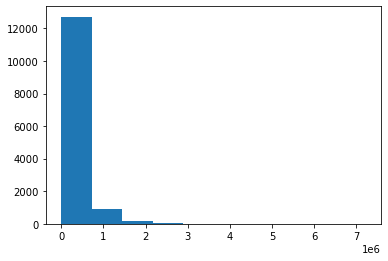

In [140]:
plt.hist(df_error['error'])
plt.show()

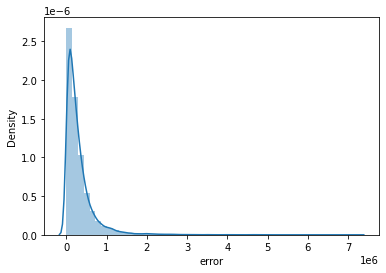

In [141]:
sns.distplot(df_error['error'])
plt.show()

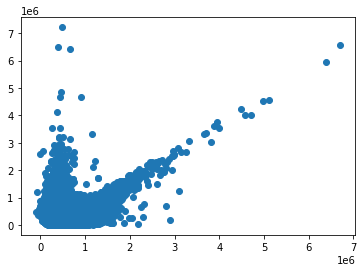

In [142]:
plt.scatter(df_error['prediksi'], df_error['error'])
plt.show()

## 6. Implementasi

Jadi kita sudah memiliki Machine Learning yang bisa memprediksi harga rumah dengan tingkat kepercayaan yang hasilnya sebesar 81%. Lalu selanjutnya apa yang dilakukan?

Machine Learning yang sudah dibuat ini bisa diimplementasikan langsung ke beberapa sektor bisnis, salah satunya sektor Pegadaian Rumah. 

Kita misalkan selama ini pihak Pegadaian Rumah selalu melakukan survey langsung ke Rumah yg dituju selama beberapa hari untuk memastikan berapa harga pastinya suatu Rumah itu dapat digadaikan. Nah jika menggunakan Machine Learning ini, kita mungkin tetap melakukan pengecekan fisik rumah secara langsung, namun waktu yang diperlukan bisa berkurang banyak karena Machine Learning ini sudah dapat memprediksi harga rumah yang akan digadaikan.

Sehingga dengan menggunakan Machine Learning ini dapat membuat proses penetuan harga rumah dari segi waktu bisa jadi lebih efektif dan efisien.